In [ ]:
#1_IMPORTO LIBRERIAS
import pandas as pd
from datetime import datetime, timedelta

In [ ]:
#2_UNO LOS 4 ARCHIVOS QUE CONTIENEN INFORMACIÓN DE ALTAS HOSPITALARIAS CON DIAGNOSTICO INSUFICIENCIA CARDIACA AÑOS 2022, 2023, 2024 Y 2025
import pandas as pd

# URLs of the files
url='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_Insuficiencia_cardiaca_2022.csv'
url1='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_Insuficiencia_cardiaca_2023.csv'
url2='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_Insuficiencia_cardiaca_2024.csv'
url3='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_Insuficiencia_cardiaca_2025.csv'

urls = [url, url1, url2, url3]

# Read and concatenate the CSV files from the URLs
df = pd.concat((pd.read_csv(url, encoding='latin-1', delimiter=';') for url in urls), ignore_index=True)

# Display the first few rows of the combined dataframe
display(df.head())
display(df.info())

,Fecha de ingreso,Fecha de alta,Día de la semana en la fecha del ingreso,Día de la semana en la fecha del alta,Zona Básica de Salud del Paciente,Ámbito de procedencia,Hospital,Área,Provincia,Edad,Sexo
0,01/01/2022 00:19:00,12/01/2022 14:05:00,Sábado,Miércoles,Z.B.S. Cebreros,Rural,C.A. Ávila,Ávila,Ávila,74,Hombre
1,01/01/2022 00:35:00,05/01/2022 14:06:00,Sábado,Miércoles,Z.B.S. Bembibre,Rural,H. El Bierzo,Bierzo,León,90,Hombre
2,01/01/2022 02:09:00,11/01/2022 19:34:00,Sábado,Martes,Z.B.S. Plaza del Ejército,Urbano,H.U. Río Hortega,Valladolid Oeste,Valladolid,88,Mujer
3,01/01/2022 02:12:00,12/01/2022 16:40:00,Sábado,Miércoles,Z.B.S. Los Comuneros,Urbano,C.A.U. Burgos,Burgos,Burgos,90,Mujer
4,01/01/2022 04:26:00,11/01/2022 18:37:00,Sábado,Martes,Z.B.S. Sta. María del Páramo,Rural,C.A.U. León,León,León,87,Mujer


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30518 entries, 0 to 30517
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Fecha de ingreso                          30518 non-null  object
 1   Fecha de alta                             30518 non-null  object
 2   Día de la semana en la fecha del ingreso  30518 non-null  object
 3   Día de la semana en la fecha del alta     30518 non-null  object
 4   Zona Básica de Salud del Paciente         30515 non-null  object
 5   Ámbito de procedencia                     30515 non-null  object
 6   Hospital                                  30518 non-null  object
 7   Área                                      30518 non-null  object
 8   Provincia                                 30518 non-null  object
 9   Edad                                      30518 non-null  int64 
 10  Sexo                                      3051

None

In [ ]:
# 3_CONVIERTO FECHAS EN DATATIME
df['Fecha de ingreso'] = pd.to_datetime(df['Fecha de ingreso'], format='%d/%m/%Y %H:%M:%S')
df['Fecha de alta'] = pd.to_datetime(df['Fecha de alta'], format='%d/%m/%Y %H:%M:%S')

In [ ]:
# GUARDAR LOS RESULTADOS EN UN ARCHIVO .CSV
df.to_csv('altas_hospitalarias_con_diagnostico_de_insuficiencia_cardiaca.csv', index=False)

In [ ]:
# 4_AGREGO UNA COLUMNA 'fecha_hosp_insuf_cardiaca' QUE CONTIENE LA FECHA EN QUE UNA PERSONA ESTA INTERNADA Y AGREGRO UNA FILA POR CADA DÍA QUE LA PERSONA ESTA HOSPITALIZADA PARA PODER FINALMENTE TENER LA INFORMACIÓN DE INTERNACIÓN
# POR DIA POR HOSPITAL

expanded_rows = []

for _, row in df.iterrows():
    ingreso = row['Fecha de ingreso']
    alta = row['Fecha de alta']
    current_date = ingreso.date()
    while current_date <= alta.date():
        new_row = row.copy()
        new_row['fecha_hosp_insuf_cardiaca'] = current_date
        expanded_rows.append(new_row)
        current_date += timedelta(days=1)

# Crear nuevo DataFrame expandido
expanded_df = pd.DataFrame(expanded_rows)

In [ ]:
# 5_ESTA NUEVA COLUMNA 'FECHA HOSPITALIZADO' LA CONVIERTO EN OBJETO DATATIME
expanded_df['fecha_hosp_insuf_cardiaca'] = pd.to_datetime(expanded_df['fecha_hosp_insuf_cardiaca'])



In [ ]:
# 6_PARA CHEQUEAR INFO NUEVA
display(expanded_df.head())
display(expanded_df.tail())
display(expanded_df.info())

,Fecha de ingreso,Fecha de alta,Día de la semana en la fecha del ingreso,Día de la semana en la fecha del alta,Zona Básica de Salud del Paciente,Ámbito de procedencia,Hospital,Área,Provincia,Edad,Sexo,fecha_hosp_insuf_cardiaca
0,2022-01-01 00:19:00,2022-01-12 14:05:00,Sábado,Miércoles,Z.B.S. Cebreros,Rural,C.A. Ávila,Ávila,Ávila,74,Hombre,2022-01-01
0,2022-01-01 00:19:00,2022-01-12 14:05:00,Sábado,Miércoles,Z.B.S. Cebreros,Rural,C.A. Ávila,Ávila,Ávila,74,Hombre,2022-01-02
0,2022-01-01 00:19:00,2022-01-12 14:05:00,Sábado,Miércoles,Z.B.S. Cebreros,Rural,C.A. Ávila,Ávila,Ávila,74,Hombre,2022-01-03
0,2022-01-01 00:19:00,2022-01-12 14:05:00,Sábado,Miércoles,Z.B.S. Cebreros,Rural,C.A. Ávila,Ávila,Ávila,74,Hombre,2022-01-04
0,2022-01-01 00:19:00,2022-01-12 14:05:00,Sábado,Miércoles,Z.B.S. Cebreros,Rural,C.A. Ávila,Ávila,Ávila,74,Hombre,2022-01-05


,Fecha de ingreso,Fecha de alta,Día de la semana en la fecha del ingreso,Día de la semana en la fecha del alta,Zona Básica de Salud del Paciente,Ámbito de procedencia,Hospital,Área,Provincia,Edad,Sexo,fecha_hosp_insuf_cardiaca
30517,2024-12-31 21:41:00,2025-01-15 18:22:00,Martes,Miércoles,Z.B.S. Palencia Rural,Rural,C.A.U. Palencia,Palencia,Palencia,91,Mujer,2025-01-11
30517,2024-12-31 21:41:00,2025-01-15 18:22:00,Martes,Miércoles,Z.B.S. Palencia Rural,Rural,C.A.U. Palencia,Palencia,Palencia,91,Mujer,2025-01-12
30517,2024-12-31 21:41:00,2025-01-15 18:22:00,Martes,Miércoles,Z.B.S. Palencia Rural,Rural,C.A.U. Palencia,Palencia,Palencia,91,Mujer,2025-01-13
30517,2024-12-31 21:41:00,2025-01-15 18:22:00,Martes,Miércoles,Z.B.S. Palencia Rural,Rural,C.A.U. Palencia,Palencia,Palencia,91,Mujer,2025-01-14
30517,2024-12-31 21:41:00,2025-01-15 18:22:00,Martes,Miércoles,Z.B.S. Palencia Rural,Rural,C.A.U. Palencia,Palencia,Palencia,91,Mujer,2025-01-15


<class 'pandas.core.frame.DataFrame'>
Index: 287197 entries, 0 to 30517
Data columns (total 12 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Fecha de ingreso                          287197 non-null  datetime64[ns]
 1   Fecha de alta                             287197 non-null  datetime64[ns]
 2   Día de la semana en la fecha del ingreso  287197 non-null  object        
 3   Día de la semana en la fecha del alta     287197 non-null  object        
 4   Zona Básica de Salud del Paciente         287180 non-null  object        
 5   Ámbito de procedencia                     287180 non-null  object        
 6   Hospital                                  287197 non-null  object        
 7   Área                                      287197 non-null  object        
 8   Provincia                                 287197 non-null  object        
 9   Edad                 

None

In [ ]:
#7 TOTAL DE PACIENTES HOSPITALIZADOS POR DÍA POR HOSPITAL
Ocupación_total_diaria = expanded_df.groupby(['fecha_hosp_insuf_cardiaca', 'Hospital']).size().reset_index(name='Occupancy')

Ocupación_total_diaria.head()

,fecha_hosp_insuf_cardiaca,Hospital,Occupancy
0,2021-11-17,C.A.U. Salamanca,1
1,2021-11-18,C.A.U. Salamanca,1
2,2021-11-19,C.A.U. Salamanca,1
3,2021-11-20,C.A.U. Salamanca,1
4,2021-11-21,C.A.U. León,1


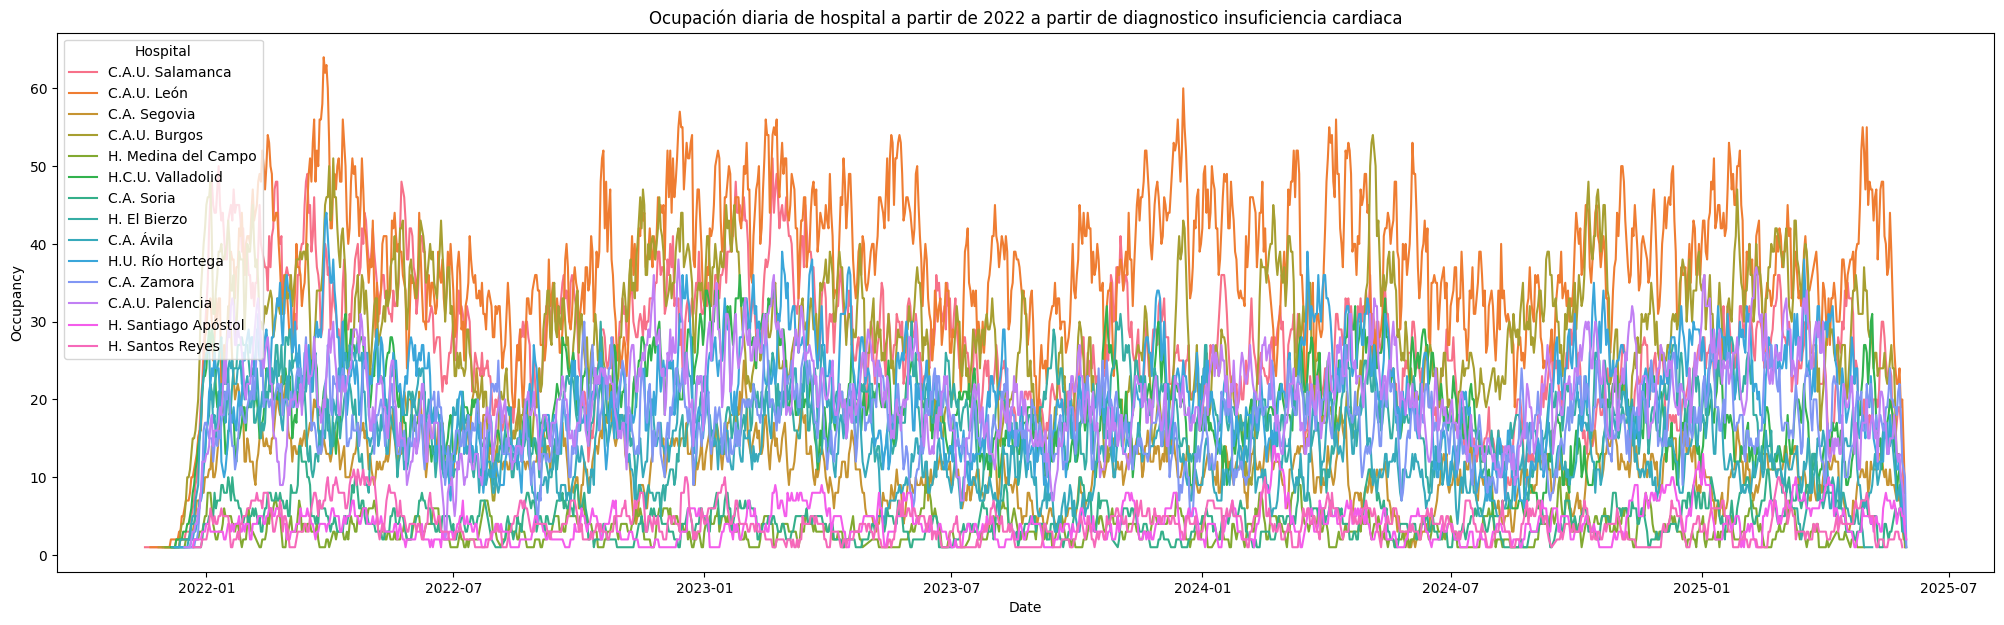

In [ ]:
#7_VER LOS REULTADOS GRAFICADOS POR DÍA POR HOSPITAL

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 7))
sns.lineplot(data=Ocupación_total_diaria, x='fecha_hosp_insuf_cardiaca', y='Occupancy', hue='Hospital')
plt.title('Ocupación diaria de hospital a partir de 2022 a partir de diagnostico insuficiencia cardiaca')
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.show()

In [ ]:
#8 GUARDAR LOS RESULTADOS EN UN ARCHIVO .CSV
Ocupación_total_diaria.to_csv('Ocupación_total_diari_insuf_cardiaca.csv', index=False)
